## Partial Derivative and Symbolic Computation
#### using sympy
#### $$\frac{\partial f}{\partial x} = \frac{2x \ ln(3) \cdot 3 ^ { -x^2 - y^2 }} {(3^{-x^2 - y^2} + 1) ^2} $$
#### $$\frac{\partial f}{\partial y} = \frac{2y \ ln(3) \cdot 3 ^ { -x^2 - y^2 }} {(3^{-x^2 - y^2} + 1) ^2} $$

In [67]:
from sympy import symbols, diff
import numpy as np
from math import log
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

In [68]:
# Cost function i.e.: How bad your guess is like MSE.
def f(x,y):
    r = 3**(-x**2 * -y**2)
    return 1/(r + 1)

a, b = symbols('x,y') # so now a & b is equivalent to x & y separately

print('Our cost function(x,y) is: {}'.format(f(a,b)))

# Diffrentiate f(x,y) with respect to x (which is a):
print('The slope of our cost function(x,y) is {}'.format(diff(f(a,b),a) ))

# Sub the value into cost function
f(a,b).evalf(subs={a:2, b:2})

# Sub the value into slope of cost function
diff(f(a,b), a).evalf(subs={a:5, b:2})

Our cost function(x,y) is: 1/(3**(x**2*y**2) + 1)
The slope of our cost function(x,y) is -2*3**(x**2*y**2)*x*y**2*log(3)/(3**(x**2*y**2) + 1)**2


-8.52666051175617e-47

In [69]:
# partial derivative for f(x,y):
def fpx(x,y):
    return -2*3**(x**2*y**2)*x*y**2*log(3)/(3**(x**2*y**2) + 1)**2

def fpy(x,y):
    return -2*3**(x**2*y**2)*x**2*y*log(3)/(3**(x**2*y**2) + 1)**2

fpx(5,2)

-8.5266605117561725e-47

## Batch Gradient Descent with SymPy

In [70]:
# setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8,1.0])#initial_guess

for n in range(max_iter):
    slope_to_x = diff(f(a,b),a).evalf(subs={a:params[0],b: params[1]}) #Heavy computation happens here becuase in every loop it needs to differentiate the function again
    slope_to_y = diff(f(a,b),b).evalf(subs={a:params[0],b: params[1]})
    gradients = np.array([slope_to_x, slope_to_y])
    params = params - multiplier * gradients
    
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-0.00233772073599977 -0.00348828201855513]
Minimum occurs at x value of:  2.01608857434648
Minimum occurs at y value of:  1.35130197561680
The cost is:  0.000287511994654684


In [75]:
# gradient descent without sympy
multiplier = 0.1
max_iter = 200
params = np.array([1.8,1.0])#initial_guess\
values_array = params.reshape(1,2) #[[1.8,1.0]], (1,2) is the new shape here
print(values_array.shape)

for n in range(max_iter):
    slope_to_x = fpx(params[0],params[1])
    slope_to_y = fpy(params[0],params[1])
    gradients = np.array([slope_to_x, slope_to_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-0.00233772 -0.00348828]
Minimum occurs at x value of:  2.0160885743464765
Minimum occurs at y value of:  1.3513019756168043
The cost is:  0.00028751199465468366


Shape of Array (200,)
Shape of Array (200, 200)


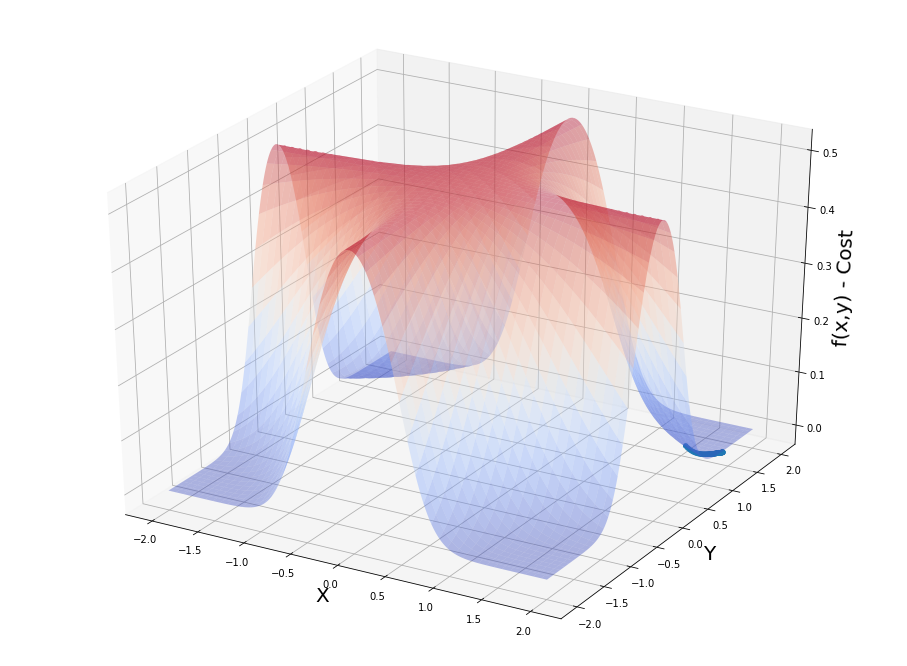

In [76]:
# generating 3d plot
# Make our x and y data
# Inappropriate Demo

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print("Shape of Array {}".format(x_4.shape))

x_4,y_4 = np.meshgrid(x_4,y_4) # returns 2-Dimensional Array representing the X and Y coordinates of all the points and thus allowing to plot a 3-D graph. Link for reference: https://www.geeksforgeeks.org/numpy-meshgrid-function/

print("Shape of Array {}".format(x_4.shape))

fig = plt.figure(figsize=[16,12]) # return a figure object
ax = fig.gca(projection='3d') # return a Axes3dSubplot, basically a 3d figure

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y) - Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.4) #coolwarm, winter, hot
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]))
plt.show()
